Version: 2019.12.18

---



# Intelligent Systems - Exercise, Instance Based Learning

# Aufgabe 1 -  k-Nächster-Nachbar-Klassifikator (kNN-Klassifikator)
Ihre Bank hat bisher Kredite and Personen verschiedenen Alters vergeben.

Der Datensatz enthält [Alter, Kredithöhe, Probleme].

In [1]:
bank_data = [
[25, 40000, 'N'],
[35, 60000, 'N'],
[45, 80000, 'N'],
[20, 20000, 'N'],
[35, 120000, 'N'],
[52, 18000, 'N'],
[23, 95000, 'Y'],
[40, 62000, 'Y'],
[60, 100000, 'Y'],
[48, 220000, 'Y'],
[33, 150000, 'Y']
]

**(1)** Entscheiden Sie mit einem 3NN-Klassifikator, ob Probleme mit einem 48-jährigen Kunden zu erwarten sind, der einen Kredit in Höhe von 142000 (Worldcoins) haben möchte.

Überlegen Sie sich die Lösung zunächst intuitiv / geometrisch und schreiben Sie dann ein Programm, um allgemeine Anfragebeispiele zu beantworten.

**(2)** Machen Sie das gleiche mit normalisierten Daten und diskutieren Sie die Ergebnisse.

## Lösung - Aufgabe 1


**Lösung (1)** 

Die Distanz eines Datenpunktes $x$ mit Attributen $\{x_i\}_i$ zu einem Datenpunkt $y$ mit Attributen $\{y_i\}_i$ wird berechnet über

$$d = \sum_{i=1}^{\nu} (x_i - y_i)^2$$

Da das zweite Attribut in einer höheren Größenordnung liegt als das erste, können wir für die Bestimmung der Distanzen das erste Attribut vernachlässigen und die drei Datenpunkte bestimmen, die am nächsten an dem "query-loan" von $142000$ liegen. Dies wären 

    (35, 120000, 'N')
    (60, 100000, 'Y')
    (33, 150000, 'Y')

Die Majorität dieser drei Punkte ist das 'Y'-Label, was dementsprechend für unnormalisierte Daten vorhergesagt werden würde. 

In [7]:
# code for unnormalized data

import numpy as np

ages = np.array([data[0] for data in bank_data])
loans = np.array([data[1] for data in bank_data])
labels = np.array([data[2] for data in bank_data])

query_age = 48
query_loan = 142000

# distances squared
distances2 = (ages - query_age)**2 + (loans - query_loan)**2

min_indices = np.argsort(distances2)[:3]

nearest_class_labels = [bank_data[index][2] for index in min_indices]

print("Prediction for unnormalized data.")
if nearest_class_labels.count('Y') >1:
  print("Predicted Y for query " + f"({query_age}, {query_loan})." )
else:
  print("Predicted N for query " + f"({query_age}, {query_loan})." )


Prediction for unnormalized data.
Predicted Y for query (48, 142000).


**Lösung (2)**

Die Normalisierung für ein Attribut $x$ erfolgt mit der Formel

$$x_{i, norm} = \frac{x_i - x_{min}}{x_{max} - x_{min}}.$$

Es ist 
$$\text{age}_{min} = 20, \; \text{age}_{max} = 60$$
und 
$$\text{loan}_{min} = 20.000, \; \text{loan}_{max} = 220.000$$.





Die normalisierten Daten sind gegeben durch (Darlehen gerundet): 




In [4]:
bank_data_norm = [
[0.125, 0.109, 'N'],
[0.375, 0.208, 'N'],
[0.625, 0.307, 'N'],
[0.0, 0.010, 'N'],
[0.375, 0.505, 'N'],
[0.8, 0.000, 'N'],
[0.075, 0.381, 'Y'],
[0.5, 0.218, 'Y'],
[1.0, 0.406, 'Y'],
[0.7, 1.0, 'Y'],
[0.325, 0.653, 'Y']
]

Der normalisierte Query ist:

$$(48, 142.000) \rightarrow^{norm} (0.7, 0.61)$$

Man kann nun entweder alle Distanzen ausrechnen oder wir plotten einfach. Wir tun hier letzteres.

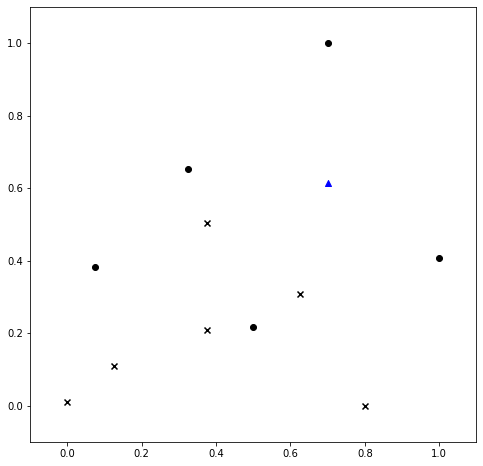

In [8]:
import matplotlib.pyplot as plt

marker = {'Y': "o", 'N': "x"}
ages_norm = [data[0] for data in bank_data_norm]
loans_norm = [data[1] for data in bank_data_norm]
markers = [marker[data[2]] for data in bank_data_norm]

query_age_norm = (48 - np.min(ages))/(np.max(ages) - np.min(ages))
query_loan_norm = (142000 - np.min(loans))/(np.max(loans) - np.min(loans))

plt.figure(figsize=(8, 8))
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.scatter(query_age_norm, query_loan_norm, marker="^", color="blue")

for i in range(len(ages_norm)):
  plt.scatter(ages_norm[i], loans_norm[i], marker=markers[i], color='black')

plt.show()

Offenbar ist es hier nicht so einfach, zu entscheiden, welche Punkte am nächsten sind. 

Prediction for normalized data.
Predicted N for query (48, 142000).


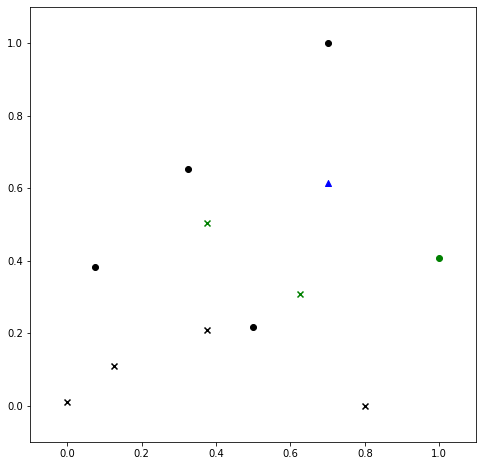

In [9]:
# nächsten drei Datenpunkte sind grün, der Query-Datenpunkt ist blau

dists_norm2 = (ages_norm - query_age_norm)**2 + (loans_norm - query_loan_norm)**2

min_indices = np.argsort(dists_norm2)[:3]

nearest_class_labels = [bank_data_norm[index][2] for index in min_indices]

print("Prediction for normalized data.")
if nearest_class_labels.count('Y') >1:
  print("Predicted Y for query " + f"({query_age}, {query_loan})." )
else:
  print("Predicted N for query " + f"({query_age}, {query_loan})." )

plt.figure(figsize=(8, 8))
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

plt.scatter(query_age_norm, query_loan_norm, marker="^", color="blue")

for i in range(len(ages_norm)):
  if i in min_indices:
    plt.scatter(ages_norm[i], loans_norm[i], marker=markers[i], color='green')
  else:
    plt.scatter(ages_norm[i], loans_norm[i], marker=markers[i], color='black')

plt.show()

# Aufgabe 2 - k-means-clustering


Gegeben ist ein Datensatz mit sechs Datenpunkten und vier verschiedenen Initialisierungen für ein "2-means clustering". 
Welche Endkonfiguration ergibt sich bei den verschiedenen Initialisierungen für die Lage der Clusterzentren und für die Zugehörigkeit der Datenpunkte zu den Clustern?

Die Koordinaten der Beispieldaten sind gegeben durch: 

$$Examples = \{(0.0, 0.0), (0.0, 1.0), (0.0, 2.0), (2.0, 0.0), (2.0, 1.0), (2.0, 2.0)\}$$


Die erste Konfiguration der Cluster ist gegeben durch: 
$${(x_i, y_i)}_i = \{(1.1, 0.5), (2.1, 2.0)\} $$
<img src="https://docs.google.com/uc?id=19SLR30rN0T0eDeCXAQJC3iWhw3QYLOFw" width=400>

Die zweite Konfiguration der Cluster ist gegeben durch: 
$${(x_i, y_i)}_i = \{(1.0, 1.0), (1.9, 2.0)\} $$
<img src="https://docs.google.com/uc?id=1jtrHSTAFv0J1HfKNVPncsJNKxxJWCy1e" width=400>

Die dritte Konfiguration der Cluster ist gegeben durch: 
$${(x_i, y_i)}_i = \{(0.1, 2.0), (2.1, 2.0)\} $$
<img src="https://docs.google.com/uc?id=1XvWChupwixj-FkLPyR2G-ACJltvlTjdK" width=400>

Die vierte Konfiguration der Cluster ist gegeben durch: 
$${(x_i, y_i)}_i = \{(2.1, 1.0), (2.1, 2.0)\} $$
<img src="https://docs.google.com/uc?id=136-hRU2XiJm2a_2ANzvCYVz1iIU63uf4" width=400>

## Lösung - Aufgabe 2
Erste End-Konfiguration: 
  - Zentren bei $(0.0, 1.0)$ und $(2.0, 1.0)$
  - Datenpunkte mit $x=0$ gehören zu Zentrum $(0.0, 1.0)$
  - Datenpunkte mit $x=2$ gehören zu Zentrum $(2.0, 1.0)$

Zweite End-Konfiguration:
  - gleich zur ersten End-Konfiguration

Dritte End-Konfiguration: 
  - gleich zur ersten End-Konfiguration

Vierte End-Konfiguration:
  - Zentren bei $(1.0, 0.5)$ und $(1.0, 2.0)$
  - Datenpunkte $\{(0.0, 0.0), (0.0, 1.0), (2.0, 0.0), (2.0, 1.0)\}$ gehören zu Zentrum $(1.0, 0.5)$
  - Datenpunkte $\{(0.0, 2.0), (2.0, 2.0)\}$ gehören zu Zentrum $(1.0, 0.5)$

# Aufgabe 3 k-means clustering


Gegeben sind 3 zweidimensionale Gaußverteilungen:

In [ ]:
import numpy as np

N = 100
varX = 0.5
varY = 0.5
covar = 0
cov = np.array([[varX, covar],
                [covar, varY]])
mean = np.array([0, 0])
clusters = [np.random.multivariate_normal(np.array([-2, 2]), cov, N)]
clusters += [np.random.multivariate_normal(np.array([2, 2]), cov, N)]
clusters += [np.random.multivariate_normal(np.array([0, -2]), cov, N)]
examples = np.concatenate((clusters[0], clusters[1], clusters[2])) 

Nutzen Sie bspw. das folgende Programmgerüst, indem sie die Lücken füllen, die in den folgenden beiden Funktionen sind: 
- assign()
- recalculate()

Bearbeiten Sie ferner folgende Aufgaben: 

**(1)** Testen Sie verschiedene Initialisierung für die Clusterzentren.

**(2)** Was passiert, wenn k ungleich 3 gewählt wird?

Für eine Animation ihrer Ergebnisse gehen Sie zu [Animation](https://drive.google.com/open?id=1NUwj8TJprt2hpiLOsM4Uslm66bY_nIG_). Sie müssen die Lücken dann nochmals ausfüllen.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot(clusters, centers, ax):
    colors = ["black", "gray", "red", "blue", "brown"]
    markers = ["^", "X", "o", "v", "s"]
    for i in range(len(clusters)):
        if len(clusters[i]) > 0:
            ax.scatter(clusters[i][:, 0], clusters[i][:, 1],
                       marker=markers[i], color=colors[i])
        ax.scatter(centers[i, 0], centers[i, 1],
                   s=200, marker=markers[i], color=colors[i])

def assign(examples, centers):
    # clusters[i] shall contain all examples, which are assigned to center i
    clusters = [np.empty((0, 2)) for _ in centers]
    for ex in examples:
        # distances of example ex to cluster centers
        dists = []
        for c in centers:
            dists += [np.sqrt(np.sum((ex-c)**2))]
        closest = np.argmin(dists)
        clusters[closest] = np.concatenate((clusters[closest], np.reshape(ex, (1, 2))))
    return clusters


def recalculate(clusters, centers):
  # calculate new cluster centers
  for i in range(len(clusters)):
      centers[i, :] = np.sum(clusters[i], 0) / clusters[i].shape[0]


#np.random.seed(123947)
k = 3
N = 100
varX = 0.5
varY = 0.5
covar = 0
cov = np.array([[varX, covar],
                [covar, varY]])
mean = np.array([0, 0])
clusters = [np.random.multivariate_normal(np.array([-2, 2]), cov, N)]
clusters += [np.random.multivariate_normal(np.array([2, 2]), cov, N)]
clusters += [np.random.multivariate_normal(np.array([0, -2]), cov, N)]
examples = np.concatenate((clusters[0], clusters[1], clusters[2]))

centers = np.random.rand(k, 2)

def one_step():
    global clusters, centers
    clusters = assign(examples, centers)
    recalculate(clusters, centers)
    print("Centers")
    print(100*"-")
    for i in range(k):
      print(f"Center {i}: ", centers[i, :])

fig = plt.figure(figsize=(8, 8))
plt.scatter(examples[:, 0], examples[:, 1], marker="o")
plt.show()

# do 'iterations' iterations
iterations = 10
for i in range(iterations):
  print(100*"=")
  print(f"Iteration {i}")
  one_step()

print(100*"=")
print("True Centers: [(-2, 2), (2, 2), (0, -2)]")